In [42]:
import numpy as np
import networkx as nx
from scipy.stats import median_abs_deviation


def create_digraph(affinity):
    k = 1.4826
    # there may be large number of 0 elements, ignore them
    masked = np.ma.masked_where(affinity == 0, affinity)
    unmasked = masked[masked.mask == False].reshape(-1)
    mad = median_abs_deviation(unmasked)
    zscores = (masked - np.median(unmasked)) / (k * mad)
    dropped = masked * (zscores < 1)
    normed = dropped / dropped.sum()
    return nx.from_numpy_matrix(normed.filled(0), create_using=nx.DiGraph)

In [7]:
n = 4
x = np.array([2, 0, 1, 0])
aff = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        aff[i][j] = x[i] * x[j]
aff

array([[4., 0., 2., 0.],
       [0., 0., 0., 0.],
       [2., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [24]:
masked = np.ma.masked_where(aff == 0, aff)
masked

masked_array(
  data=[[4.0, --, 2.0, --],
        [--, --, --, --],
        [2.0, --, 1.0, --],
        [--, --, --, --]],
  mask=[[False,  True, False,  True],
        [ True,  True,  True,  True],
        [False,  True, False,  True],
        [ True,  True,  True,  True]],
  fill_value=1e+20)

In [25]:
masked.reshape(-1)

masked_array(data=[4.0, --, 2.0, --, --, --, --, --, 2.0, --, 1.0, --, --,
                   --, --, --],
             mask=[False,  True, False,  True,  True,  True,  True,  True,
                   False,  True, False,  True,  True,  True,  True,  True],
       fill_value=1e+20)

In [26]:
np.median(masked[masked.mask == False])

2.0

In [27]:
median_abs_deviation(masked[masked.mask == False].reshape(-1))

0.5

In [29]:
masked.filled(0)

array([[4., 0., 2., 0.],
       [0., 0., 0., 0.],
       [2., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [35]:
affinity = aff
k = 1.4826
# there may be large number of 0 elements, ignore them
masked = np.ma.masked_where(affinity == 0, affinity)
unmasked = masked[masked.mask == False].reshape(-1)
mad = median_abs_deviation(unmasked)
zscores = (masked - np.median(unmasked)) / (k * mad)
dropped = masked * (zscores < 1)
normed = dropped / dropped.sum()

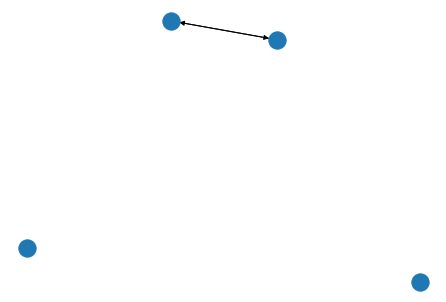

In [44]:
G = create_digraph(aff)
nx.draw(G)